In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data=pd.read_csv('/content/mnist_train.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [20]:
def init_params():
    W1 = np.random.randn(128, 784) * np.sqrt(2./784)
    b1 = np.zeros((128, 1))
    W2 = np.random.randn(10, 128) * np.sqrt(2./128)
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    exp = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp / np.sum(exp, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y, m_batch, num_classes):
    one_hot_Y = one_hot(Y, num_classes)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m_batch * dZ2.dot(A1.T) + 0.01 * W2
    db2 = 1 / m_batch * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * (Z1 > 0)
    dW1 = 1 / m_batch * dZ1.dot(X.T) + 0.01 * W1 
    db1 = 1 / m_batch * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)

num_classes = 10
Y_train = np.clip(Y_train, 0, num_classes - 1)

def one_hot(Y, num_classes):
    one_hot_Y = np.zeros((num_classes, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y


def gradient_descent(X, Y, alpha, iterations, batch_size=32, num_classes=10):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        for j in range(0, X.shape[1], batch_size):
            X_batch = X[:, j:j+batch_size]
            Y_batch = Y[j:j+batch_size]
            m_batch = X_batch.shape[1]

            Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_batch)
            dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X_batch, Y_batch, m_batch, num_classes)
            W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 10 == 0:
            _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration: {i}, Accuracy: {accuracy}")

            # Learning rate decay
            alpha = alpha * (1. / (1 + 0.0001 * i))

        # Early stopping
        if accuracy > 0.98:
            print(f"Early stopping at iteration {i}")
            break

    return W1, b1, W2, b2


In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 5000)

Prediction:  [3]
Label:  3


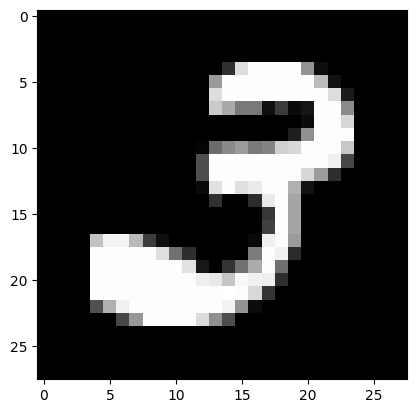

Prediction:  [5]
Label:  5


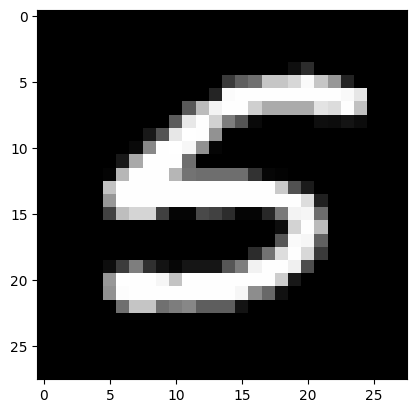

Prediction:  [5]
Label:  5


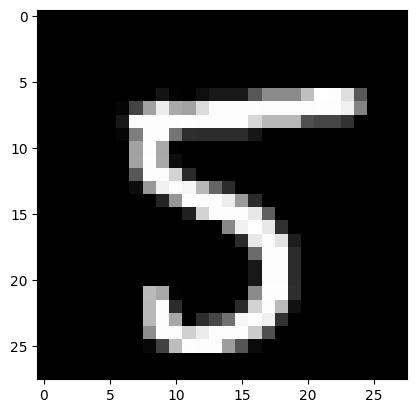

Prediction:  [7]
Label:  7


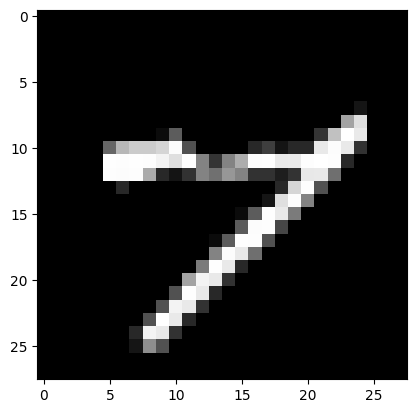

Prediction:  [4]
Label:  4


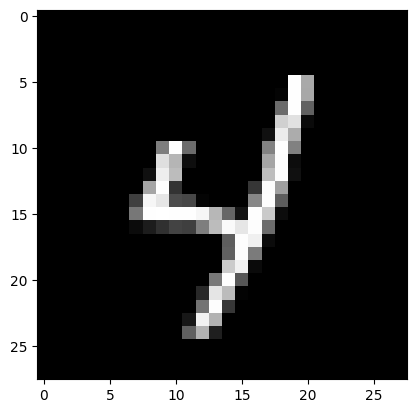

In [24]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

for i in range(5):
    test_prediction(i, W1, b1, W2, b2)

Prediction:  [3]
Label:  3


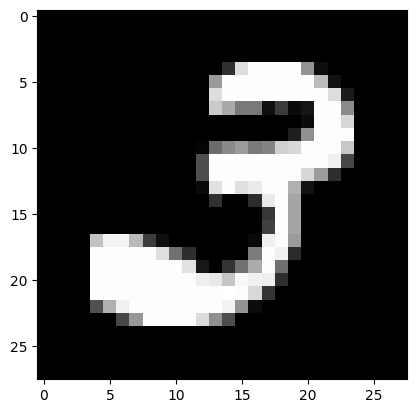

Prediction:  [5]
Label:  5


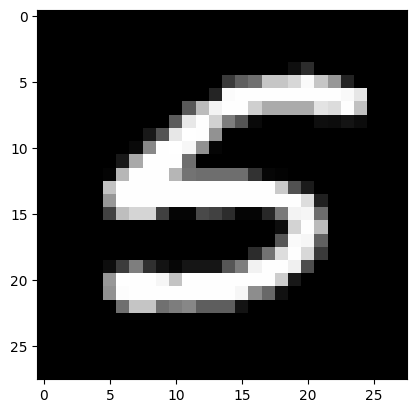

Prediction:  [5]
Label:  5


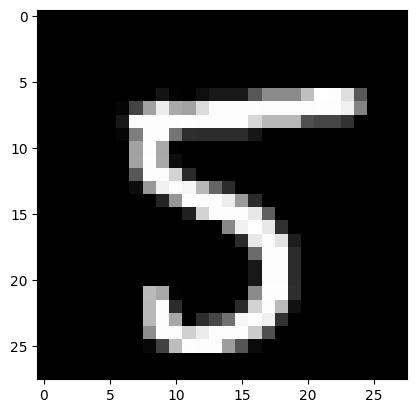

Prediction:  [7]
Label:  7


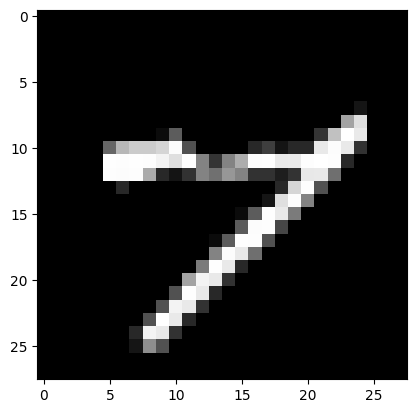

In [25]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [26]:
from google.colab import files
# Save the parameters as .npy files
np.save('W1.npy', W1)
np.save('b1.npy', b1)
np.save('W2.npy', W2)
np.save('b2.npy', b2)

# Download the files to your local machine
files.download('W1.npy')
files.download('b1.npy')
files.download('W2.npy')
files.download('b2.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>